<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/3_OutlierUSing_IQREXCERSISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)
from google.colab import files
import io

In [3]:
uploaded=files.upload()

Saving height_weight.csv to height_weight.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['height_weight.csv']))
df

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


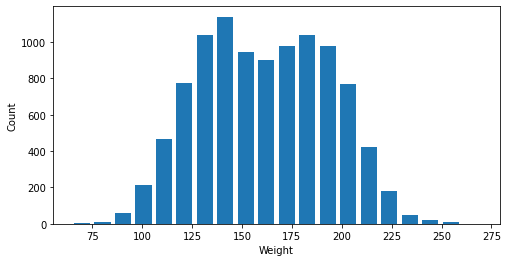

In [9]:
plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()


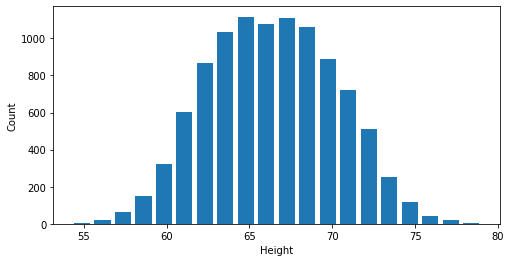

In [10]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [11]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [12]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [13]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [14]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [15]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [16]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [17]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(55.00265861279534, 77.67722359525831)

In [19]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
